# Lab1. Introduction to pandas

In [1]:
%matplotlib inline 
import numpy as np 
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns #sets up styles and gives us more plotting options

In [3]:
%pwd

u'/home/johnx/Documents/Github/CS109/2015lab1_XQ'

## pandas

In [8]:
df = pd.read_csv("../2015lab1/all.csv", header = None,
                names=["rating", 'review_count', 'isbn', 'booktype','author_url', 'year', 
                       'genre_urls', 'dir','rating_count', 'name'])
df.head()

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
0,4.40,136455,0439023483,good_reads:book,https://www.goodreads.com/author/show/153394.S...,2008,/genres/young-adult|/genres/science-fiction|/g...,dir01/2767052-the-hunger-games.html,2958974,"The Hunger Games (The Hunger Games, #1)"
1,4.41,16648,0439358078,good_reads:book,https://www.goodreads.com/author/show/1077326....,2003,/genres/fantasy|/genres/young-adult|/genres/fi...,dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...,1284478,Harry Potter and the Order of the Phoenix (Har...
2,3.56,85746,0316015849,good_reads:book,https://www.goodreads.com/author/show/941441.S...,2005,/genres/young-adult|/genres/fantasy|/genres/ro...,dir01/41865.Twilight.html,2579564,"Twilight (Twilight, #1)"
3,4.23,47906,0061120081,good_reads:book,https://www.goodreads.com/author/show/1825.Har...,1960,/genres/classics|/genres/fiction|/genres/histo...,dir01/2657.To_Kill_a_Mockingbird.html,2078123,To Kill a Mockingbird
4,4.23,34772,0679783261,good_reads:book,https://www.goodreads.com/author/show/1265.Jan...,1813,/genres/classics|/genres/fiction|/genres/roman...,dir01/1885.Pride_and_Prejudice.html,1388992,Pride and Prejudice


## The basics

In [10]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

In [11]:
# 6000 rows x 10 columns
df.shape

(6000, 10)

In [12]:
df.shape[0], df.shape[1]

(6000, 10)

In [13]:
df.columns

Index([u'rating', u'review_count', u'isbn', u'booktype', u'author_url', u'year', u'genre_urls', u'dir', u'rating_count', u'name'], dtype='object')

In [14]:
type(df.rating), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

## Querying

In [15]:
# the following command actually returns a pandas Series
# and most numpy functions that work on numpy.ndarray
# also work on pandas Series
df.rating < 3

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
...
5985    False
5986    False
5987    False
5988    False
5989    False
5990    False
5991    False
5992    False
5993    False
5994    False
5995    False
5996    False
5997    False
5998    False
5999    False
Name: rating, Length: 6000, dtype: bool

In [16]:
# total number of records with rating < 3
np.sum(df.rating < 3)

4

In [18]:
# ratio of records with rating < 3
np.sum(df.rating < 3) / float(df.shape[0])

0.00066666666666666664

In [19]:
np.mean(df.rating < 3.0)

0.00066666666666666664

In [20]:
# pandas Series data type has mean() method
(df.rating < 3).mean()

0.00066666666666666664

## Filtering

Select the rows that meet the filtering conditions. 

Two ways:  
* SQL like syntax  
* numpy mask-array-like syntax

In [21]:
df.query("rating < 3.0")

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2609,2.90,8,NaN,good_reads:book,https://www.goodreads.com/author/show/7707820....,2013,/genres/romance|/genres/realistic-fiction|/gen...,dir27/19546932-how-to-be-a-perfect-girl.html,31,How To Be A Perfect Girl
3738,2.00,368,0983650322,good_reads:book,https://www.goodreads.com/author/show/9414.Vic...,2011,/genres/young-adult|/genres/science-fiction|/g...,dir38/12393909-revealing-eden.html,688,"Revealing Eden (Save the Pearls, #1)"
5844,2.97,1399,0395083621,good_reads:book,https://www.goodreads.com/author/show/30691.Ad...,1925,/genres/history|/genres/non-fiction|/genres/bi...,dir59/54270.Mein_Kampf.html,12417,Mein Kampf
5979,2.77,800,0060988649,good_reads:book,https://www.goodreads.com/author/show/7025.Gre...,2001,/genres/fantasy|/genres/fiction|/genres/myster...,dir60/24929.Lost.html,11128,Lost


In [22]:
# select with a mask
df[df.year < 0]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
47,3.68,5785,0143039954,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fiction|/genres/poetr...,dir01/1381.The_Odyssey.html,560248,The Odyssey
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
455,3.85,1499,0140449140,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-380,/genres/philosophy|/genres/classics|/genres/no...,dir05/30289.The_Republic.html,82022,The Republic
596,3.77,1240,0679729526,good_reads:book,https://www.goodreads.com/author/show/919.Virgil,-29,/genres/classics|/genres/poetry|/genres/fictio...,dir06/12914.The_Aeneid.html,60308,The Aeneid
629,3.64,1231,1580495931,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-429,/genres/classics|/genres/plays|/genres/drama|/...,dir07/1554.Oedipus_Rex.html,93192,Oedipus Rex
674,3.92,3559,1590302257,good_reads:book,https://www.goodreads.com/author/show/1771.Sun...,-512,/genres/non-fiction|/genres/politics|/genres/c...,dir07/10534.The_Art_of_War.html,114619,The Art of War
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
777,3.52,1038,1580493882,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-442,/genres/drama|/genres/fiction|/genres/classics...,dir08/7728.Antigone.html,49084,Antigone
1233,3.94,704,015602764X,good_reads:book,https://www.goodreads.com/author/show/1002.Sop...,-400,/genres/classics|/genres/plays|/genres/drama|/...,dir13/1540.The_Oedipus_Cycle.html,36008,The Oedipus Cycle
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables


If you want to combine these conditions, use the second form and put '()' around each condition. The query uses a boolean AND. Each condition ceates a mask of trues and falses.

In [23]:
df[(df.year<0) & (df.rating > 4)]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
246,4.01,365,0147712556,good_reads:book,https://www.goodreads.com/author/show/903.Homer,-800,/genres/classics|/genres/fantasy|/genres/mytho...,dir03/1375.The_Iliad_The_Odyssey.html,35123,The Iliad/The Odyssey
746,4.06,1087,0140449183,good_reads:book,https://www.goodreads.com/author/show/5158478....,-500,/genres/classics|/genres/spirituality|/genres/...,dir08/99944.The_Bhagavad_Gita.html,31634,The Bhagavad Gita
1397,4.03,890,0192840509,good_reads:book,https://www.goodreads.com/author/show/12452.Aesop,-560,/genres/classics|/genres/childrens|/genres/lit...,dir14/21348.Aesop_s_Fables.html,71259,Aesop's Fables
1882,4.02,377,0872205541,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400,/genres/philosophy|/genres/classics|/genres/no...,dir19/22632.The_Trial_and_Death_of_Socrates.html,18712,The Trial and Death of Socrates
3133,4.30,131,0872203492,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-400,/genres/philosophy|/genres/classics|/genres/no...,dir32/9462.Complete_Works.html,7454,Complete Works
4475,4.11,281,0865163480,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-390,/genres/philosophy|/genres/classics|/genres/no...,dir45/73945.Apology.html,11478,Apology
5367,4.07,133,0872206335,good_reads:book,https://www.goodreads.com/author/show/879.Plato,-360,/genres/philosophy|/genres/classics|/genres/no...,dir54/30292.Five_Dialogues.html,9964,Five Dialogues


## Cleaning

We first check the datatypes. Notice that review_count, rating_count are of type object (which means they are either strings or Pandas couldnt figure what they are), while year is a float.

In [24]:
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Suppose we try and fix this

In [25]:
df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

ValueError: invalid literal for long() with base 10: 'None'

Its trying to convert some python datatype: None into an int. This usually means data was missing. Was it?

In [26]:
# select all the rows that 'year' is null
df[df.year.isnull()]

,rating,review_count,isbn,booktype,author_url,year,genre_urls,dir,rating_count,name
2442,4.23,526,NaN,good_reads:book,https://www.goodreads.com/author/show/623606.A...,NaN,/genres/religion|/genres/islam|/genres/non-fic...,dir25/1301625.La_Tahzan.html,4134,La Tahzan
2869,4.61,2,NaN,good_reads:book,https://www.goodreads.com/author/show/8182217....,NaN,NaN,dir29/22031070-my-death-experiences---a-preach...,23,My Death Experiences - A Preacherâs 18 Apoca...
3643,NaN,None,None,None,None,NaN,NaN,dir37/9658936-harry-potter.html,None,None
5282,NaN,None,None,None,None,NaN,NaN,dir53/113138.The_Winner.html,None,None
5572,3.71,35,8423336603,good_reads:book,https://www.goodreads.com/author/show/285658.E...,NaN,/genres/fiction,dir56/890680._rase_una_vez_el_amor_pero_tuve_q...,403,Ãrase una vez el amor pero tuve que matarlo. ...
5658,4.32,44,NaN,good_reads:book,https://www.goodreads.com/author/show/25307.Ro...,NaN,/genres/fantasy|/genres/fantasy|/genres/epic-f...,dir57/5533041-assassin-s-apprentice-royal-assa...,3850,Assassin's Apprentice / Royal Assassin (Farsee...
5683,4.56,204,NaN,good_reads:book,https://www.goodreads.com/author/show/3097905....,NaN,/genres/fantasy|/genres/young-adult|/genres/ro...,dir57/12474623-tiger-s-dream.html,895,"Tiger's Dream (The Tiger Saga, #5)"


We had some incomplete data, lets get rid of it

In [27]:
# select all the rows that 'year' has a valid value
df = df[df.year.notnull()]
df.shape

(5993, 10)

In [28]:
df['rating_count']=df.rating_count.astype(int)
df['review_count']=df.review_count.astype(int)
df['year']=df.year.astype(int)

In [29]:
df.dtypes

rating          float64
review_count      int64
isbn             object
booktype         object
author_url       object
year              int64
genre_urls       object
dir              object
rating_count      int64
name             object
dtype: object

## Visualizing

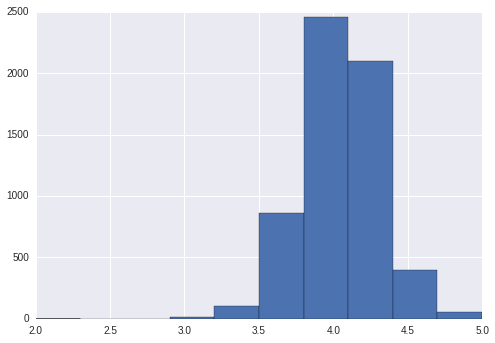

In [32]:
# Note the semicolon
df.rating.hist(); # have a look of the rating distribution

We can do this in more detail, plotting against a mean, with cutom binsize or number of bins. Note how to label axes and create legends.

4.04199733022 4.04199733022 4.05


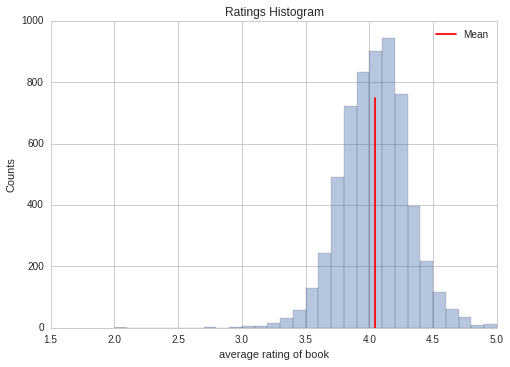

In [33]:
sns.set_context("notebook")
meanrat=df.rating.mean()
#you can get means and medians in different ways
print meanrat, np.mean(df.rating), df.rating.median()
with sns.axes_style("whitegrid"):
    df.rating.hist(bins=30, alpha=0.4);
    plt.axvline(meanrat, 0, 0.75, color='r', label='Mean')
    plt.xlabel("average rating of book")
    plt.ylabel("Counts")
    plt.title("Ratings Histogram")
    plt.legend()
    #sns.despine()

One can see the sparseness of review counts. This will be important when we learn about recommendations: we'll have to regularize our models to deal with it.

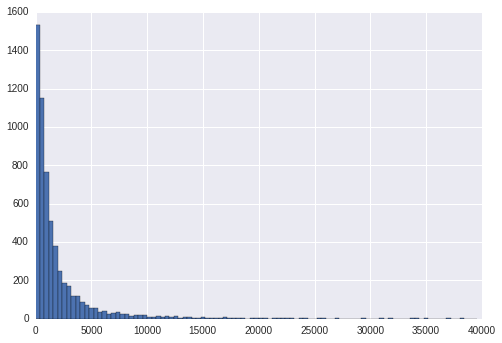

In [34]:
df.review_count.hist(bins = np.arange(0, 40000, 400))

The structure may be easier to see if we rescale the x-axis to be logarithmic

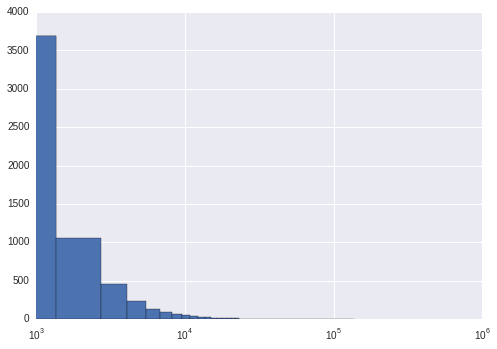

In [35]:
df.review_count.hist(bins = 100)
plt.xscale("log");

Here we make a scatterplot in matplotlib of rating against year. By setting the alpha transparency low we can see how the density of highly rated books on goodreads has changed.

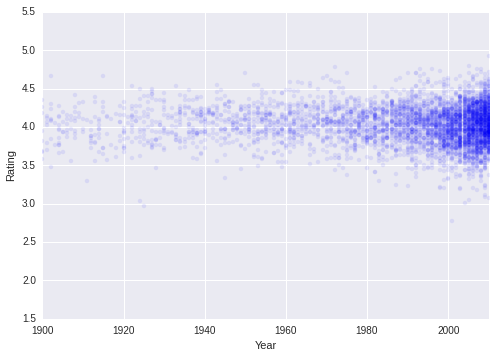

In [36]:
plt.scatter(df.year, df.rating, lw=0, alpha=.08)
plt.xlim([1900,2010])
plt.xlabel("Year")
plt.ylabel("Rating")

## Python and ducks

Notice that we used the series in the x-list and y-list slots in the scatter function in the plt module.

In working with python I always remember: a python is a duck.

What I mean is, python has a certain way of doing things. For example lets call one of these ways listiness. Listiness works on lists, dictionaries, files, and a general notion of something called an iterator.

A Pandas series plays like a python list:

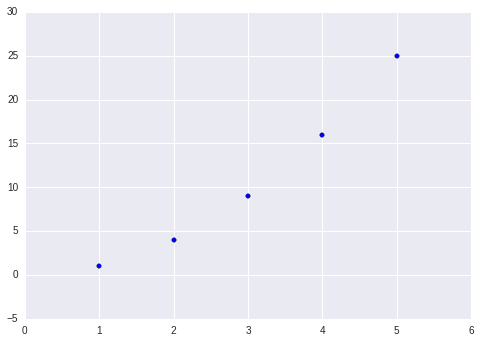

In [38]:
alist = [1, 2, 3, 4, 5]
asquarelist = [i**2 for i in alist]
plt.scatter(alist, asquarelist)

In [39]:
print type(alist)

<type 'list'>


In other words, something is a duck if it quacks like a duck. A Pandas series quacks like a python list. They both support something called the iterator protocol, an notion of behaving in a "listy" way. And Python functions like plt.scatter will accept anything that behaves listy. Indeed here's one more example:

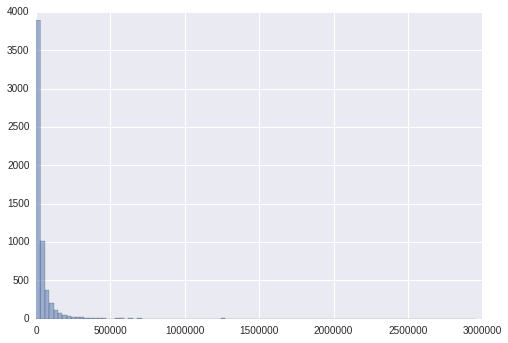

In [43]:
# df.rating_count is pandas Series
plt.hist(df.rating_count, bins = 100, alpha=0.5);

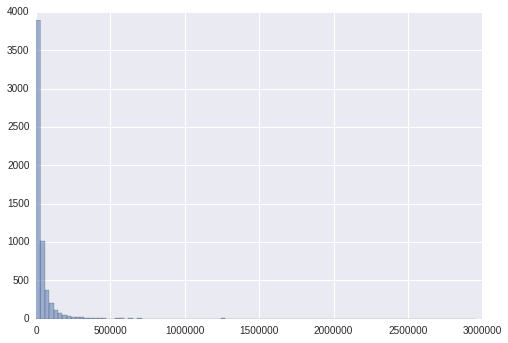

In [44]:
# df.rating_count.values is  numpy.ndarray
plt.hist(df.rating_count.values, bins = 100, alpha=0.5);

In [45]:
print type(df.rating_count), type(df.rating_count.values)

<class 'pandas.core.series.Series'> <type 'numpy.ndarray'>


Series and numpy lists behave similarly

## Vectorization

Numpy arrays are a bit different from regular python lists, and are the bread and butter of data science. Pandas Series are built atop them.

In other words, operations on numpy arrays, and by extension, Pandas Series, are vectorized. You can add two numpy lists by just using + whereas the result isnt what you might expect for regular python lists. To add regular python lists elementwise, you will need to use a loop. 

Vectorization is a powerful idiom, and we will use it a lot in this class. And, for almost all data intensive computing, we will use numpy arrays rather than python lists, as the python numerical stack is based on it.
You have seen this in idea in spreadsheets where you add an entire column to another one.